In [1]:
import numpy as np
import matplotlib.pyplot as plt

# data

In [2]:
f=open("data/MultipleLR.csv")
multi_data=np.loadtxt(f,delimiter=",")

In [3]:
multi_data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [4]:
x_0=np.ones((len(multi_data[:,0]) , 1))

In [5]:
x_0.shape

(25, 1)

In [6]:
multi_X=np.concatenate((x_0, multi_data[:,:3].reshape(len(multi_data[:,0]) , 3)),axis=1)
multi_X

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [7]:
multi_Y=multi_data[:,3]
multi_Y=multi_Y.reshape((multi_Y.shape[0],1))
multi_Y

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

# Batch

In [8]:
loss=[]

def multi_Batch_GD(x,y, alpha=0.0001, iterations_no=100):
    """
    X is a matrix contain the multi features
    Y is a vector contains actual data
    """
    #1. intialize theta vector
    theta_vector=np.zeros(x.shape[1]).reshape(x.shape[1],1)
    thetas=theta_vector.T
    
    for e in range(iterations_no):
        print('======================================================')
        print('epoch ',e)
        
        #2.calculate y predicted 
        y_hat=np.dot(x,theta_vector)
        
        #3.cost function 
        error=y_hat - y
        J=(np.dot(error.T, error))/(2*x.shape[0])
        loss.append(J[0][0])
        print("cost= ",J[0][0])
    
    
        #4. gradient vector
        gradient_vector=np.zeros(x.shape[1])
        gradient_vector=(np.dot(x.T,(y_hat - y ) ))/(x.shape[0])
        
        #5.update parameters
         
        theta_vector=theta_vector - alpha *  gradient_vector
        
        thetas=np.vstack([thetas, theta_vector.T])
        
    return y_hat, theta_vector, thetas
    
    

In [9]:
multi_y_predict,thetaVector,ths =multi_Batch_GD(multi_X,multi_Y)

epoch  0
cost=  13405.98
epoch  1
cost=  12348.66764284116
epoch  2
cost=  11374.779042807399
epoch  3
cost=  10477.73186089601
epoch  4
cost=  9651.463121043067
epoch  5
cost=  8890.388231093177
epoch  6
cost=  8189.363237116848
epoch  7
cost=  7543.650055956269
epoch  8
cost=  6948.884451009944
epoch  9
cost=  6401.046534807663
epoch  10
cost=  5896.433599005872
epoch  11
cost=  5431.635088164095
epoch  12
cost=  5003.509548152805
epoch  13
cost=  4609.163393389342
epoch  14
cost=  4245.931349391832
epoch  15
cost=  3911.3584384643746
epoch  16
cost=  3603.183386756538
epoch  17
cost=  3319.323340547242
epoch  18
cost=  3057.859788451898
epoch  19
cost=  2817.0255944025284
epoch  20
cost=  2595.193053758065
epoch  21
cost=  2390.8628918172985
epoch  22
cost=  2202.654130376585
epoch  23
cost=  2029.2947538414085
epoch  24
cost=  1869.6131118050057
epoch  25
cost=  1722.529999984952
epoch  26
cost=  1587.0513659936032
epoch  27
cost=  1462.261590641422
epoch  28
cost=  1347.3172993622

In [10]:
ths.shape

(101, 4)

In [11]:
multi_y_predict.shape

(25, 1)

### Plot loss vs. iterations

Text(0, 0.5, 'loss')

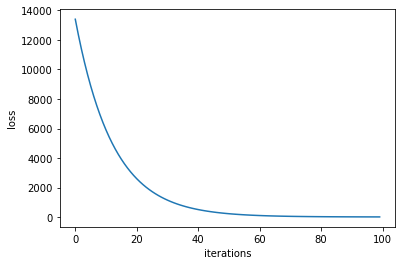

In [12]:
plt.plot(loss) # alpha is important here ---> make it small as possible
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

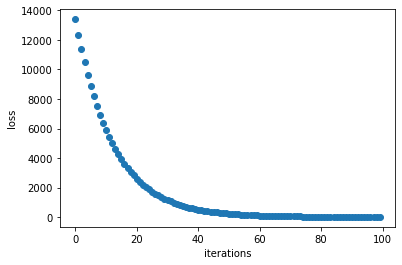

In [13]:
plt.plot(loss,"o")
plt.xlabel("iterations")
plt.ylabel("loss")

### loss vs. parameters

Text(0, 0.5, 'loss')

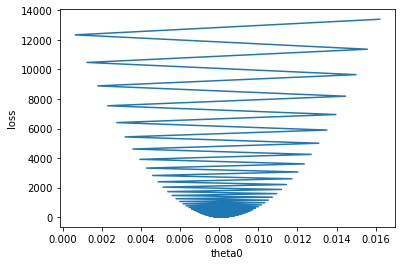

In [14]:
plt.plot(ths[1:,0],loss)
plt.xlabel("theta0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

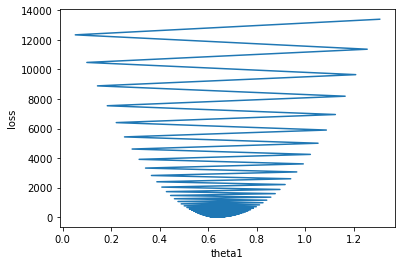

In [15]:
plt.plot(ths[1:,1],loss)
plt.xlabel("theta1")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

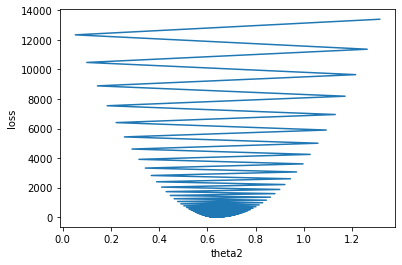

In [16]:
plt.plot(ths[1:,2],loss)
plt.xlabel("theta2")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

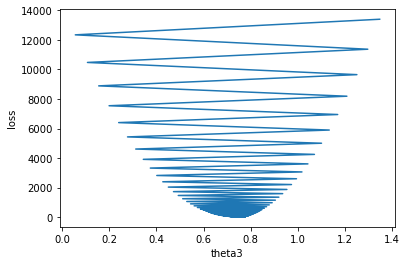

In [17]:
plt.plot(ths[1:,3],loss)
plt.xlabel("theta3")
plt.ylabel("loss")

In [18]:
from sklearn.metrics import r2_score

In [19]:
# Use R2 score to evaluate LR equation output
r2_score(multi_Y,multi_y_predict)


0.9679211293123435

# try stop condition

# using sklearn

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
Multi_LR=LinearRegression()

In [22]:
Multi_LR=Multi_LR.fit(multi_X,multi_Y)

In [23]:
multi_Y_pre=Multi_LR.predict(multi_X)
print(multi_Y_pre)

[[152.60720439]
 [185.08011472]
 [181.78158547]
 [199.74522647]
 [139.1747207 ]
 [103.69391793]
 [150.2632274 ]
 [112.82069728]
 [174.55948394]
 [164.49442094]
 [143.42337551]
 [142.23416416]
 [186.54285759]
 [152.40794527]
 [151.24409108]
 [189.12496613]
 [143.50219218]
 [181.89389361]
 [177.29838914]
 [158.34934019]
 [176.57742415]
 [174.66365778]
 [167.68889392]
 [150.63279846]
 [191.1954116 ]]


In [24]:
r2_score(multi_Y,multi_Y_pre)

0.9896615789448399

# Mini Batch

In [31]:
x_mini=multi_X.copy()
x_mini.shape

(25, 4)

In [32]:
y_mini=multi_Y.copy()
y_mini.shape

(25, 1)

In [29]:
def mini_batches(x,y,batch_size):
    x_batches=[]
    y_batches=[]
    number_of_batches=len(x)//batch_size
    
    for i in range(number_of_batches):
        x_batches.append(x[i*batch_size: (i+1)*batch_size])
        y_batches.append(y[i*batch_size : (i+1)*batch_size])
    return x_batches, y_batches
        
    

In [148]:
def MiniBatch_GD(x,y, batch_size=1,alpha=0.0001, Epochs_no=100):
    loss=[]
    Y_predict_list=[]
    
    x_batchs=[]
    y_batchs=[]
    
    #get the batches 
    x_batchs,y_batchs=mini_batches(x,y,batch_size)
    
    #1. assume intial values for parameters 
    theta_vector=np.zeros(x.shape[1]).reshape(x.shape[1],1)
    thetas=theta_vector.T
    
    for e in range(Epochs_no): #epochs loop
        print('==============================================')
        print('epoch ',e)
        
        Y_pred_per_epoch=[]
        for i in range(len(x_batchs)):#loop through all batches
            #2.predict 
            y_predicted=np.dot(x_batchs[i],theta_vector)
            Y_pred_per_epoch.extend(y_predicted)
            #3.cost 
            error= y_predicted - y_batchs[i]
            J= (np.dot(error.T, error))/(2*batch_size)
            loss.append(J[0][0])
            
    
            #4. gradient vector
            gradient_vector=np.zeros(x_batchs[i].shape[1])
            gradient_vector=(np.dot(x_batchs[i].T,(y_predicted - y_batchs[i]) ))/(batch_size)

            #5. update parameters
           
            
            theta_vector=theta_vector - alpha *  gradient_vector
        
            thetas=np.vstack([thetas, theta_vector.T])
        
             
            
        print('cost= ', J[0][0])
        Y_predict_list.append(Y_pred_per_epoch)
        #stop condition
        
        if(e!=0):
            if abs(prev_cost - J)<0.001:
                break
        prev_cost=J
        
        
    return Y_pred_per_epoch, theta_vector, thetas,loss
            
    
    

In [152]:
y_mini_predict,theta_mini_Vector,ths_mini,losses_mini =MiniBatch_GD(x_mini,y_mini,5,0.0001,1000)

epoch  0
cost=  3180.856112541741
epoch  1
cost=  1829.635500591102
epoch  2
cost=  345.74321056441426
epoch  3
cost=  381.1962389484354
epoch  4
cost=  27.3557964725863
epoch  5
cost=  118.98294765029826
epoch  6
cost=  14.911362721557675
epoch  7
cost=  60.6935740692928
epoch  8
cost=  25.573099391694036
epoch  9
cost=  44.41996538936907
epoch  10
cost=  31.70434839128801
epoch  11
cost=  38.997640889787924
epoch  12
cost=  34.22430915383792
epoch  13
cost=  36.95612910751227
epoch  14
cost=  35.109213425211884
epoch  15
cost=  36.09036756448571
epoch  16
cost=  35.33919468658523
epoch  17
cost=  35.65581882976443
epoch  18
cost=  35.31798679699394
epoch  19
cost=  35.38387429691967
epoch  20
cost=  35.2028821826125
epoch  21
cost=  35.17484495418591
epoch  22
cost=  35.05395950359697
epoch  23
cost=  34.991297052062706
epoch  24
cost=  34.89398233688777
epoch  25
cost=  34.81909305306496
epoch  26
cost=  34.7315329964715
epoch  27
cost=  34.65286523353626
epoch  28
cost=  34.5698246

cost=  29.09406263723946
epoch  127
cost=  29.057040380072767
epoch  128
cost=  29.020299033873137
epoch  129
cost=  28.983836279016693
epoch  130
cost=  28.9476498172829
epoch  131
cost=  28.911737371631425
epoch  132
cost=  28.876096685979633
epoch  133
cost=  28.840725524987278
epoch  134
cost=  28.805621673838925
epoch  135
cost=  28.770782938032944
epoch  136
cost=  28.73620714316822
epoch  137
cost=  28.70189213473879
epoch  138
cost=  28.667835777927586
epoch  139
cost=  28.634035957401657
epoch  140
cost=  28.600490577112758
epoch  141
cost=  28.567197560098926
epoch  142
cost=  28.534154848286228
epoch  143
cost=  28.501360402297497
epoch  144
cost=  28.468812201258146
epoch  145
cost=  28.43650824260711
epoch  146
cost=  28.404446541910914
epoch  147
cost=  28.372625132675957
epoch  148
cost=  28.34104206616671
epoch  149
cost=  28.30969541122539
epoch  150
cost=  28.278583254091057
epoch  151
cost=  28.24770369822388
epoch  152
cost=  28.217054864130112
epoch  153
cost=  28.

epoch  290
cost=  25.56674439629867
epoch  291
cost=  25.555548931748444
epoch  292
cost=  25.544432073303827
epoch  293
cost=  25.533393244763346
epoch  294
cost=  25.522431874434318
epoch  295
cost=  25.511547395091203
epoch  296
cost=  25.500739243939627
epoch  297
cost=  25.49000686257757
epoch  298
cost=  25.479349696957165
epoch  299
cost=  25.468767197349443
epoch  300
cost=  25.4582588183058
epoch  301
cost=  25.44782401862057
epoch  302
cost=  25.437462261298947
epoch  303
cost=  25.427173013516953
epoch  304
cost=  25.416955746586762
epoch  305
cost=  25.40680993592427
epoch  306
cost=  25.396735061010947
epoch  307
cost=  25.386730605362054
epoch  308
cost=  25.37679605649016
epoch  309
cost=  25.36693090587311
epoch  310
cost=  25.357134648920987
epoch  311
cost=  25.347406784938475
epoch  312
cost=  25.33774681709999
epoch  313
cost=  25.328154252408957
epoch  314
cost=  25.3186286016705
epoch  315
cost=  25.309169379458663
epoch  316
cost=  25.299776104083715
epoch  317
c

cost=  24.557933874134953
epoch  432
cost=  24.553714801971513
epoch  433
cost=  24.549524401487382
epoch  434
cost=  24.545362472986387
epoch  435
cost=  24.541228818210936
epoch  436
cost=  24.537123240336037
epoch  437
cost=  24.533045543955197
epoch  438
cost=  24.528995535072134
epoch  439
cost=  24.524973021086616
epoch  440
cost=  24.520977810788587
epoch  441
cost=  24.51700971434309
epoch  442
cost=  24.513068543282493
epoch  443
cost=  24.50915411049538
epoch  444
cost=  24.505266230215398
epoch  445
cost=  24.501404718013866
epoch  446
cost=  24.49756939078541
epoch  447
cost=  24.493760066742173
epoch  448
cost=  24.489976565399925
epoch  449
cost=  24.486218707572625
epoch  450
cost=  24.482486315357892
epoch  451
cost=  24.478779212131265
epoch  452
cost=  24.475097222533684
epoch  453
cost=  24.47144017246421
epoch  454
cost=  24.46780788906852
epoch  455
cost=  24.46420020073173
epoch  456
cost=  24.460616937066206
epoch  457
cost=  24.457057928905847
epoch  458
cost=  

cost=  24.180086277493196
epoch  569
cost=  24.178413047236553
epoch  570
cost=  24.176750974982568
epoch  571
cost=  24.17509998506668
epoch  572
cost=  24.17346000234633
epoch  573
cost=  24.171830952202868
epoch  574
cost=  24.170212760531665
epoch  575
cost=  24.168605353742375
epoch  576
cost=  24.167008658754487
epoch  577
cost=  24.16542260299209
epoch  578
cost=  24.163847114382197
epoch  579
cost=  24.16228212135138
epoch  580
cost=  24.160727552818685
epoch  581
cost=  24.1591833381979
epoch  582
cost=  24.157649407388362
epoch  583
cost=  24.156125690775045
epoch  584
cost=  24.154612119223877
epoch  585
cost=  24.153108624078932
epoch  586
cost=  24.15161513715745
epoch  587
cost=  24.15013159074875
epoch  588
cost=  24.148657917609082
epoch  589
cost=  24.147194050959303
epoch  590
cost=  24.14573992448087
epoch  591
cost=  24.1442954723126
epoch  592
cost=  24.14286062904997
epoch  593
cost=  24.14143532973521
epoch  594
cost=  24.14001950986409
epoch  595
cost=  24.13861

In [153]:
len(y_mini_predict)

25

Text(0, 0.5, 'loss')

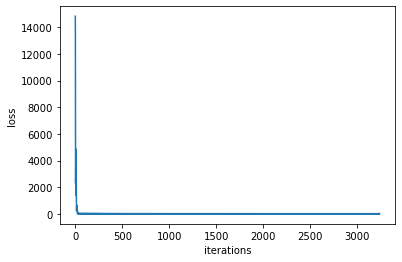

In [154]:
#loss vs. iterations
plt.plot(losses_mini) # alpha is important here ---> make it small as possible
plt.xlabel("iterations")
plt.ylabel("loss")

In [155]:
ths_mini.shape

(3241, 4)

Text(0, 0.5, 'loss')

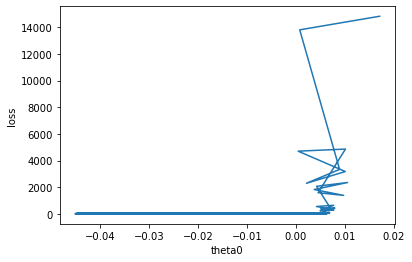

In [156]:
plt.plot(ths_mini[1:,0],losses_mini)
plt.xlabel("theta0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

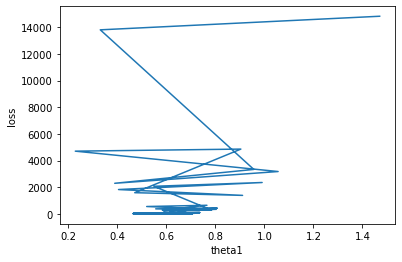

In [157]:
plt.plot(ths_mini[1:,1],losses_mini)
plt.xlabel("theta1")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

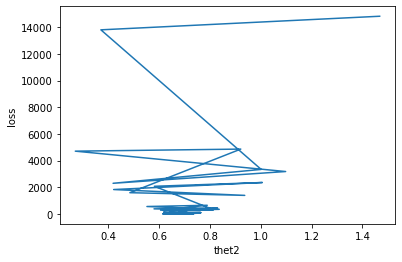

In [158]:
plt.plot(ths_mini[1:,2],losses_mini)
plt.xlabel("thet2")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

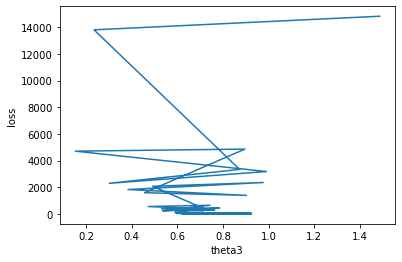

In [159]:
plt.plot(ths_mini[1:,3],losses_mini)
plt.xlabel("theta3")
plt.ylabel("loss")

In [160]:
r2_score(y_mini,y_mini_predict)

0.9578332420017561

# Try shuffle

In [161]:
data_to_shuffle=np.hstack([x_mini,y_mini])
data_to_shuffle

array([[  1.,  73.,  80.,  75., 152.],
       [  1.,  93.,  88.,  93., 185.],
       [  1.,  89.,  91.,  90., 180.],
       [  1.,  96.,  98., 100., 196.],
       [  1.,  73.,  66.,  70., 142.],
       [  1.,  53.,  46.,  55., 101.],
       [  1.,  69.,  74.,  77., 149.],
       [  1.,  47.,  56.,  60., 115.],
       [  1.,  87.,  79.,  90., 175.],
       [  1.,  79.,  70.,  88., 164.],
       [  1.,  69.,  70.,  73., 141.],
       [  1.,  70.,  65.,  74., 141.],
       [  1.,  93.,  95.,  91., 184.],
       [  1.,  79.,  80.,  73., 152.],
       [  1.,  70.,  73.,  78., 148.],
       [  1.,  93.,  89.,  96., 192.],
       [  1.,  78.,  75.,  68., 147.],
       [  1.,  81.,  90.,  93., 183.],
       [  1.,  88.,  92.,  86., 177.],
       [  1.,  78.,  83.,  77., 159.],
       [  1.,  82.,  86.,  90., 177.],
       [  1.,  86.,  82.,  89., 175.],
       [  1.,  78.,  83.,  85., 175.],
       [  1.,  76.,  83.,  71., 149.],
       [  1.,  96.,  93.,  95., 192.]])

In [162]:
np.random.shuffle(data_to_shuffle)
data_to_shuffle

array([[  1.,  53.,  46.,  55., 101.],
       [  1.,  69.,  70.,  73., 141.],
       [  1.,  89.,  91.,  90., 180.],
       [  1.,  93.,  88.,  93., 185.],
       [  1.,  88.,  92.,  86., 177.],
       [  1.,  78.,  75.,  68., 147.],
       [  1.,  79.,  80.,  73., 152.],
       [  1.,  81.,  90.,  93., 183.],
       [  1.,  78.,  83.,  85., 175.],
       [  1.,  73.,  66.,  70., 142.],
       [  1.,  70.,  65.,  74., 141.],
       [  1.,  96.,  93.,  95., 192.],
       [  1.,  93.,  95.,  91., 184.],
       [  1.,  87.,  79.,  90., 175.],
       [  1.,  73.,  80.,  75., 152.],
       [  1.,  69.,  74.,  77., 149.],
       [  1.,  96.,  98., 100., 196.],
       [  1.,  47.,  56.,  60., 115.],
       [  1.,  82.,  86.,  90., 177.],
       [  1.,  93.,  89.,  96., 192.],
       [  1.,  76.,  83.,  71., 149.],
       [  1.,  78.,  83.,  77., 159.],
       [  1.,  86.,  82.,  89., 175.],
       [  1.,  79.,  70.,  88., 164.],
       [  1.,  70.,  73.,  78., 148.]])

In [163]:
x_shuffled=data_to_shuffle[:, : 4]
x_shuffled

array([[  1.,  53.,  46.,  55.],
       [  1.,  69.,  70.,  73.],
       [  1.,  89.,  91.,  90.],
       [  1.,  93.,  88.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  75.,  68.],
       [  1.,  79.,  80.,  73.],
       [  1.,  81.,  90.,  93.],
       [  1.,  78.,  83.,  85.],
       [  1.,  73.,  66.,  70.],
       [  1.,  70.,  65.,  74.],
       [  1.,  96.,  93.,  95.],
       [  1.,  93.,  95.,  91.],
       [  1.,  87.,  79.,  90.],
       [  1.,  73.,  80.,  75.],
       [  1.,  69.,  74.,  77.],
       [  1.,  96.,  98., 100.],
       [  1.,  47.,  56.,  60.],
       [  1.,  82.,  86.,  90.],
       [  1.,  93.,  89.,  96.],
       [  1.,  76.,  83.,  71.],
       [  1.,  78.,  83.,  77.],
       [  1.,  86.,  82.,  89.],
       [  1.,  79.,  70.,  88.],
       [  1.,  70.,  73.,  78.]])

In [164]:
y_shuffled=data_to_shuffle[:,4]
y_shuffled=y_shuffled.reshape((y_shuffled.shape[0],1))
y_shuffled.shape # note if not reshaped it will make errors in the algorithm

(25, 1)

In [166]:
y_mini_sh_predict,theta_mini_sh_Vector,ths_mini_sh,losses_mini_sh =MiniBatch_GD(x_shuffled,y_shuffled,5,0.0001,1000)

epoch  0
cost=  8707.447111049041
epoch  1
cost=  6846.374942034532
epoch  2
cost=  3196.276277992175
epoch  3
cost=  2876.3458060514886
epoch  4
cost=  1126.0489966484997
epoch  5
cost=  1255.3237527317085
epoch  6
cost=  369.54561315106577
epoch  7
cost=  578.7272527182871
epoch  8
cost=  106.80038587147757
epoch  9
cost=  287.49660253668816
epoch  10
cost=  24.64332588970698
epoch  11
cost=  156.94454399826887
epoch  12
cost=  5.298356147605422
epoch  13
cost=  95.44074106079084
epoch  14
cost=  5.643254509442375
epoch  15
cost=  64.81111836829055
epoch  16
cost=  10.64860550889034
epoch  17
cost=  48.66983897334067
epoch  18
cost=  15.581962513407252
epoch  19
cost=  39.7011170739396
epoch  20
cost=  19.30709955359281
epoch  21
cost=  34.478201840455355
epoch  22
cost=  21.82534020928234
epoch  23
cost=  31.308284323665806
epoch  24
cost=  23.41512294102416
epoch  25
cost=  29.309421422568867
epoch  26
cost=  24.358613171856437
epoch  27
cost=  27.999536685776235
epoch  28
cost=  2

cost=  18.65779279218953
epoch  131
cost=  18.614297810853817
epoch  132
cost=  18.571147557230216
epoch  133
cost=  18.528338003083398
epoch  134
cost=  18.485865187241323
epoch  135
cost=  18.443725215095782
epoch  136
cost=  18.401914256606588
epoch  137
cost=  18.36042854553396
epoch  138
cost=  18.31926437775541
epoch  139
cost=  18.27841811035043
epoch  140
cost=  18.237886160128536
epoch  141
cost=  18.19766500264178
epoch  142
cost=  18.157751170861417
epoch  143
cost=  18.118141254164136
epoch  144
cost=  18.078831897114497
epoch  145
cost=  18.039819798456612
epoch  146
cost=  18.001101709976634
epoch  147
cost=  17.962674435512177
epoch  148
cost=  17.924534829881843
epoch  149
cost=  17.88667979791988
epoch  150
cost=  17.849106293466328
epoch  151
cost=  17.81181131842562
epoch  152
cost=  17.7747919218135
epoch  153
cost=  17.73804519884342
epoch  154
cost=  17.701568290021942
epoch  155
cost=  17.665358380266852
epoch  156
cost=  17.629412698044025
epoch  157
cost=  17.5

cost=  14.728501393748434
epoch  274
cost=  14.711784724261989
epoch  275
cost=  14.695168202514726
epoch  276
cost=  14.678651159453853
epoch  277
cost=  14.662232931806276
epoch  278
cost=  14.645912862011992
epoch  279
cost=  14.629690298142895
epoch  280
cost=  14.613564593838436
epoch  281
cost=  14.59753510822797
epoch  282
cost=  14.58160120586832
epoch  283
cost=  14.565762256668226
epoch  284
cost=  14.55001763583096
epoch  285
cost=  14.534366723775856
epoch  286
cost=  14.518808906088935
epoch  287
cost=  14.503343573443823
epoch  288
cost=  14.487970121553706
epoch  289
cost=  14.472687951097319
epoch  290
cost=  14.457496467669477
epoch  291
cost=  14.442395081713688
epoch  292
cost=  14.427383208469925
epoch  293
cost=  14.412460267913238
epoch  294
cost=  14.397625684699486
epoch  295
cost=  14.382878888110174
epoch  296
cost=  14.368219311997459
epoch  297
cost=  14.353646394731175
epoch  298
cost=  14.33915957914546
epoch  299
cost=  14.32475831248814
epoch  300
cost= 

epoch  399
cost=  13.237583576092636
epoch  400
cost=  13.22958040966202
epoch  401
cost=  13.221623083954256
epoch  402
cost=  13.213711328674645
epoch  403
cost=  13.205844875229536
epoch  404
cost=  13.198023456716177
epoch  405
cost=  13.190246807909336
epoch  406
cost=  13.182514665248382
epoch  407
cost=  13.174826766826238
epoch  408
cost=  13.167182852376119
epoch  409
cost=  13.159582663261219
epoch  410
cost=  13.152025942460664
epoch  411
cost=  13.14451243455972
epoch  412
cost=  13.137041885737082
epoch  413
cost=  13.12961404375442
epoch  414
cost=  13.122228657943285
epoch  415
cost=  13.114885479195772
epoch  416
cost=  13.10758425995233
epoch  417
cost=  13.100324754189876
epoch  418
cost=  13.09310671741325
epoch  419
cost=  13.08592990664194
epoch  420
cost=  13.078794080401199
epoch  421
cost=  13.071698998709078
epoch  422
cost=  13.064644423069671
epoch  423
cost=  13.057630116456846
epoch  424
cost=  13.050655843312114
epoch  425
cost=  13.043721369524524
epoch  

cost=  12.544623984201149
epoch  519
cost=  12.540562719471774
epoch  520
cost=  12.536524399791883
epoch  521
cost=  12.53250889370226
epoch  522
cost=  12.528516070513486
epoch  523
cost=  12.524545800303548
epoch  524
cost=  12.520597953913969
epoch  525
cost=  12.51667240294267
epoch  526
cost=  12.51276901974267
epoch  527
cost=  12.508887677413274
epoch  528
cost=  12.5050282498001
epoch  529
cost=  12.501190611485846
epoch  530
cost=  12.497374637790264
epoch  531
cost=  12.493580204761889
epoch  532
cost=  12.489807189175204
epoch  533
cost=  12.486055468527486
epoch  534
cost=  12.482324921031411
epoch  535
cost=  12.478615425613047
epoch  536
cost=  12.474926861906193
epoch  537
cost=  12.471259110249775
epoch  538
cost=  12.467612051680934
epoch  539
cost=  12.463985567932719
epoch  540
cost=  12.460379541429248
epoch  541
cost=  12.456793855281935
epoch  542
cost=  12.453228393283785
epoch  543
cost=  12.44968303990844
epoch  544
cost=  12.446157680301132
epoch  545
cost=  

cost=  12.175516441199743
epoch  646
cost=  12.173532637254329
epoch  647
cost=  12.171559952152972
epoch  648
cost=  12.169598323015885
epoch  649
cost=  12.167647687326177
epoch  650
cost=  12.165707982922736
epoch  651
cost=  12.163779148001453
epoch  652
cost=  12.161861121111802
epoch  653
cost=  12.159953841153737
epoch  654
cost=  12.158057247380038
epoch  655
cost=  12.156171279386175
epoch  656
cost=  12.15429587711849
epoch  657
cost=  12.152430980862551
epoch  658
cost=  12.150576531247893
epoch  659
cost=  12.148732469242958
epoch  660
cost=  12.146898736153394
epoch  661
cost=  12.145075273620487
epoch  662
cost=  12.143262023619759
epoch  663
cost=  12.14145892845793
epoch  664
cost=  12.139665930770947
epoch  665
cost=  12.137882973523286
epoch  666
cost=  12.136110000005148
epoch  667
cost=  12.13434695383035
epoch  668
cost=  12.132593778935803
epoch  669
cost=  12.130850419576754
epoch  670
cost=  12.129116820328973
epoch  671
cost=  12.127392926082791
epoch  672
cost

cost=  12.004859591871824
epoch  763
cost=  12.003829939444657
epoch  764
cost=  12.002806026591529
epoch  765
cost=  12.001787821054755
epoch  766
cost=  12.000775290761926
epoch  767
cost=  11.999768403819878
epoch  768
cost=  11.998767128516196
epoch  769
cost=  11.997771433319835


Text(0, 0.5, 'loss')

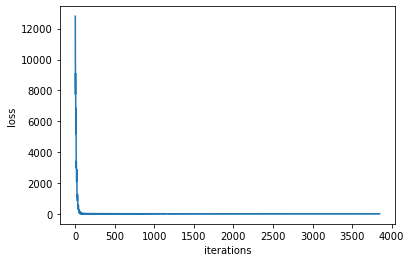

In [167]:
#loss vs. iterations
plt.plot(losses_mini_sh) # alpha is important here ---> make it small as possible
plt.xlabel("iterations")
plt.ylabel("loss")

In [168]:
ths_mini_sh.shape

(3851, 4)

Text(0, 0.5, 'loss')

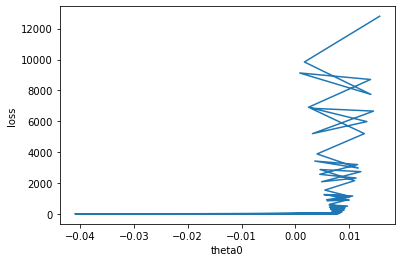

In [169]:
plt.plot(ths_mini_sh[1:,0],losses_mini_sh)
plt.xlabel("theta0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

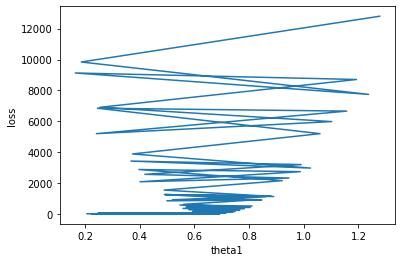

In [170]:
plt.plot(ths_mini_sh[1:,1],losses_mini_sh)
plt.xlabel("theta1")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

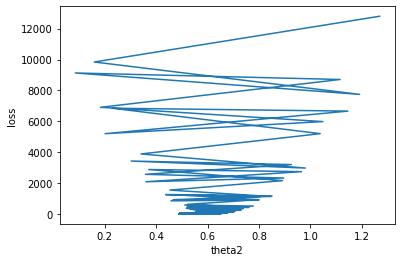

In [171]:
plt.plot(ths_mini_sh[1:,2],losses_mini_sh)
plt.xlabel("theta2")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

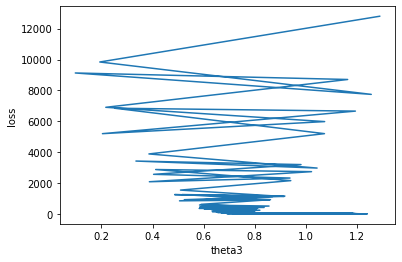

In [172]:
plt.plot(ths_mini_sh[1:,3],losses_mini_sh)
plt.xlabel("theta3")
plt.ylabel("loss")

In [173]:
r2_score(y_shuffled,y_mini_sh_predict)

0.9688053709218495

# stochastic GD
make batch size=1

In [177]:
y_st_predict,theta_st_Vector,ths_st,losses_st =MiniBatch_GD(x_shuffled,y_shuffled,1,0.00001,1000)

epoch  0
cost=  0.784342576214767
epoch  1
cost=  1.9640620013299086
epoch  2
cost=  1.9834714850760458
epoch  3
cost=  1.997079795819492
epoch  4
cost=  2.0106544787057845
epoch  5
cost=  2.0242187164004886
epoch  6
cost=  2.0377722910078018
epoch  7
cost=  2.0513148938251806
epoch  8
cost=  2.064846220195597
epoch  9
cost=  2.078365969845309
epoch  10
cost=  2.0918738468381703
epoch  11
cost=  2.105369559527708
epoch  12
cost=  2.1188528205105297
epoch  13
cost=  2.132323346579773
epoch  14
cost=  2.145780858679188
epoch  15
cost=  2.1592250818580716
epoch  16
cost=  2.1726557452255846
epoch  17
cost=  2.186072581906622
epoch  18
cost=  2.1994753289981746
epoch  19
cost=  2.2128637275245775
epoch  20
cost=  2.226237522395608
epoch  21
cost=  2.239596462362804
epoch  22
cost=  2.2529402999775594
epoch  23
cost=  2.2662687915493307
epoch  24
cost=  2.2795816971041263
epoch  25
cost=  2.2928787803432678
epoch  26
cost=  2.306159808603336
epoch  27
cost=  2.319424552815285
epoch  28
cost

cost=  3.313084568307865
epoch  108
cost=  3.3245342284517316
epoch  109
cost=  3.3359579403198443
epoch  110
cost=  3.347355666649126
epoch  111
cost=  3.358727371529485
epoch  112
cost=  3.370073020387204
epoch  113
cost=  3.381392579968899
epoch  114
cost=  3.392686018324716
epoch  115
cost=  3.4039533047926054
epoch  116
cost=  3.4151944099826474
epoch  117
cost=  3.426409305760527
epoch  118
cost=  3.437597965232982
epoch  119
cost=  3.4487603627315777
epoch  120
cost=  3.4598964737979383
epoch  121
cost=  3.471006275168038
epoch  122
cost=  3.482089744758546
epoch  123
cost=  3.4931468616505863
epoch  124
cost=  3.504177606075992
epoch  125
cost=  3.5151819594026947
epoch  126
cost=  3.526159904120286
epoch  127
cost=  3.537111423825978
epoch  128
cost=  3.5480365032105894
epoch  129
cost=  3.558935128044548
epoch  130
cost=  3.5698072851645946
epoch  131
cost=  3.5806529624592898
epoch  132
cost=  3.5914721488570405
epoch  133
cost=  3.6022648343113257
epoch  134
cost=  3.613031

cost=  4.630378082772785
epoch  244
cost=  4.63833639480487
epoch  245
cost=  4.646271166859016
epoch  246
cost=  4.654182445996048
epoch  247
cost=  4.662070279439222
epoch  248
cost=  4.66993471457112
epoch  249
cost=  4.677775798929384
epoch  250
cost=  4.685593580203902
epoch  251
cost=  4.693388106232297
epoch  252
cost=  4.701159424996798
epoch  253
cost=  4.708907584621323
epoch  254
cost=  4.716632633366706
epoch  255
cost=  4.724334619628682
epoch  256
cost=  4.732013591933571
epoch  257
cost=  4.739669598935143
epoch  258
cost=  4.747302689411897
epoch  259
cost=  4.75491291226272
epoch  260
cost=  4.762500316504615
epoch  261
cost=  4.770064951269343
epoch  262
cost=  4.777606865799767
epoch  263
cost=  4.785126109447289
epoch  264
cost=  4.792622731668912
epoch  265
cost=  4.80009678202329
epoch  266
cost=  4.807548310168757
epoch  267
cost=  4.814977365859741
epoch  268
cost=  4.82238399894437
epoch  269
cost=  4.829768259360798
epoch  270
cost=  4.837130197135261
epoch  2

cost=  5.381061938872954
epoch  355
cost=  5.386713180344446
epoch  356
cost=  5.392346487410614
epoch  357
cost=  5.39796190997236
epoch  358
cost=  5.403559497869185
epoch  359
cost=  5.409139300877803
epoch  360
cost=  5.4147013687118974
epoch  361
cost=  5.4202457510206905
epoch  362
cost=  5.425772497388645
epoch  363
cost=  5.431281657334171
epoch  364
cost=  5.436773280309463
epoch  365
cost=  5.44224741569887
epoch  366
cost=  5.4477041128189665
epoch  367
cost=  5.453143420917145
epoch  368
cost=  5.458565389171642
epoch  369
cost=  5.463970066689879
epoch  370
cost=  5.469357502508348
epoch  371
cost=  5.474727745591836
epoch  372
cost=  5.480080844832496
epoch  373
cost=  5.485416849049686
epoch  374
cost=  5.49073580698851
epoch  375
cost=  5.49603776731969
epoch  376
cost=  5.501322778638993
epoch  377
cost=  5.506590889466396
epoch  378
cost=  5.511842148245258
epoch  379
cost=  5.517076603342091
epoch  380
cost=  5.522294303045955
epoch  381
cost=  5.527495295567321
epoc

cost=  5.901541414391611
epoch  464
cost=  5.905515117535255
epoch  465
cost=  5.909475842521412
epoch  466
cost=  5.913423629622142
epoch  467
cost=  5.917358519007614
epoch  468
cost=  5.921280550749188
epoch  469
cost=  5.925189764816141
epoch  470
cost=  5.929086201078269
epoch  471
cost=  5.932969899304103
epoch  472
cost=  5.936840899161865
epoch  473
cost=  5.940699240219164
epoch  474
cost=  5.944544961942895
epoch  475
cost=  5.948378103699633
epoch  476
cost=  5.95219870475487
epoch  477
cost=  5.956006804274105
epoch  478
cost=  5.959802441321801
epoch  479
cost=  5.963585654862205
epoch  480
cost=  5.9673564837588025
epoch  481
cost=  5.971114966774568
epoch  482
cost=  5.9748611425722205
epoch  483
cost=  5.978595049713705
epoch  484
cost=  5.982316726660654
epoch  485
cost=  5.9860262117744805
epoch  486
cost=  5.989723543315966
epoch  487
cost=  5.99340875944586
epoch  488
cost=  5.997081898224581
epoch  489
cost=  6.000742997611848
epoch  490
cost=  6.004392095467875
ep

cost=  6.257803327206199
epoch  570
cost=  6.260606255921639
epoch  571
cost=  6.2633999257456825
epoch  572
cost=  6.266184366686379
epoch  573
cost=  6.268959608661996
epoch  574
cost=  6.271725681501581
epoch  575
cost=  6.274482614945221
epoch  576
cost=  6.277230438643399
epoch  577
cost=  6.2799691821585775
epoch  578
cost=  6.282698874963747
epoch  579
cost=  6.285419546443916
epoch  580
cost=  6.288131225895383
epoch  581
cost=  6.290833942527021
epoch  582
cost=  6.293527725459052
epoch  583
cost=  6.296212603724346
epoch  584
cost=  6.298888606267902
epoch  585
cost=  6.301555761947752
epoch  586
cost=  6.304214099534549
epoch  587
cost=  6.306863647711772
epoch  588
cost=  6.3095044350762315
epoch  589
cost=  6.312136490138071
epoch  590
cost=  6.314759841321084
epoch  591
cost=  6.317374516962722
epoch  592
cost=  6.319980545314513
epoch  593
cost=  6.322577954541779
epoch  594
cost=  6.32516677272436
epoch  595
cost=  6.327747027856644
epoch  596
cost=  6.330318747847583
e

cost=  6.543266412136369
epoch  694
cost=  6.545124074206212
epoch  695
cost=  6.546975574316618
epoch  696
cost=  6.548820932830516
epoch  697
cost=  6.550660170046027
epoch  698
cost=  6.552493306195155
epoch  699
cost=  6.554320361445469
epoch  700
cost=  6.556141355898592
epoch  701
cost=  6.557956309591676
epoch  702
cost=  6.559765242497338
epoch  703
cost=  6.561568174523185
epoch  704
cost=  6.563365125512671
epoch  705
cost=  6.5651561152452445
epoch  706
cost=  6.566941163436289
epoch  707
cost=  6.568720289737266
epoch  708
cost=  6.570493513736481
epoch  709
cost=  6.572260854957996
epoch  710
cost=  6.5740223328636365
epoch  711
cost=  6.575777966851385
epoch  712
cost=  6.577527776256674
epoch  713
cost=  6.579271780352635
epoch  714
cost=  6.58100999834923
epoch  715
cost=  6.5827424493943285
epoch  716
cost=  6.584469152574076
epoch  717
cost=  6.586190126912121
epoch  718
cost=  6.587905391370496
epoch  719
cost=  6.589614964849987
epoch  720
cost=  6.591318866189777
e

cost=  6.731131386186119
epoch  817
cost=  6.732365687054553
epoch  818
cost=  6.7335958921195
epoch  819
cost=  6.73482201498219
epoch  820
cost=  6.736044069197865
epoch  821
cost=  6.737262068277169
epoch  822
cost=  6.738476025686075
epoch  823
cost=  6.739685954846026
epoch  824
cost=  6.740891869133452
epoch  825
cost=  6.742093781880946
epoch  826
cost=  6.743291706376893
epoch  827
cost=  6.7444856558650805
epoch  828
cost=  6.745675643545785
epoch  829
cost=  6.7468616825756
epoch  830
cost=  6.748043786067367
epoch  831
cost=  6.749221967090117
epoch  832
cost=  6.7503962386698335
epoch  833
cost=  6.751566613789392
epoch  834
cost=  6.7527331053882875
epoch  835
cost=  6.753895726363401
epoch  836
cost=  6.75505448956811
epoch  837
cost=  6.7562094078140955
epoch  838
cost=  6.757360493869618
epoch  839
cost=  6.758507760461435
epoch  840
cost=  6.759651220273172
epoch  841
cost=  6.760790885946728
epoch  842
cost=  6.761926770082004
epoch  843
cost=  6.76305888523726
epoch 

In [178]:
r2_score(y_shuffled,y_st_predict)

0.9878395185024101

Text(0, 0.5, 'loss')

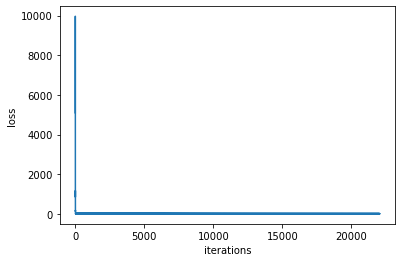

In [179]:
#loss vs. iterations
plt.plot(losses_st) # alpha is important here ---> make it small as possible
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

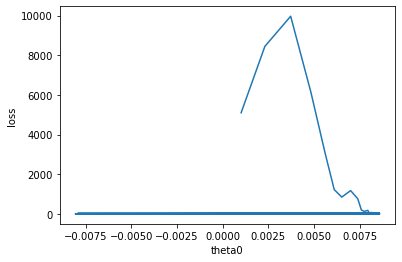

In [180]:
plt.plot(ths_st[1:,0],losses_st)
plt.xlabel("theta0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

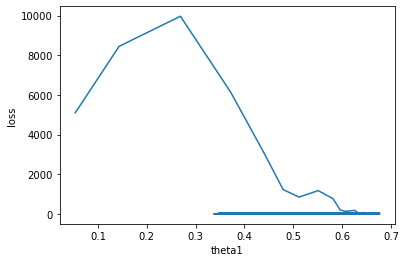

In [181]:
plt.plot(ths_st[1:,1],losses_st)
plt.xlabel("theta1")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

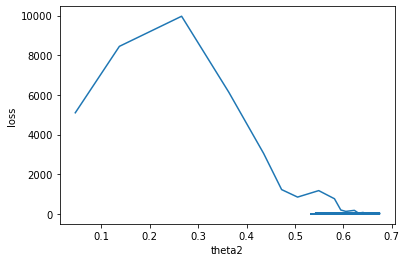

In [182]:
plt.plot(ths_st[1:,2],losses_st)
plt.xlabel("theta2")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

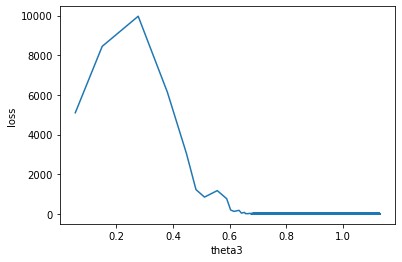

In [183]:
plt.plot(ths_st[1:,3],losses_st)
plt.xlabel("theta3")
plt.ylabel("loss")

# check batch result of the function

In [184]:
y_batch_predict,theta_batch_Vector,ths_batch,losses_batch =MiniBatch_GD(x_mini,y_mini,len(x_mini))

epoch  0
cost=  13405.98
epoch  1
cost=  12348.66764284116
epoch  2
cost=  11374.779042807399
epoch  3
cost=  10477.73186089601
epoch  4
cost=  9651.463121043067
epoch  5
cost=  8890.388231093177
epoch  6
cost=  8189.363237116848
epoch  7
cost=  7543.650055956269
epoch  8
cost=  6948.884451009944
epoch  9
cost=  6401.046534807663
epoch  10
cost=  5896.433599005872
epoch  11
cost=  5431.635088164095
epoch  12
cost=  5003.509548152805
epoch  13
cost=  4609.163393389342
epoch  14
cost=  4245.931349391832
epoch  15
cost=  3911.3584384643746
epoch  16
cost=  3603.183386756538
epoch  17
cost=  3319.323340547242
epoch  18
cost=  3057.859788451898
epoch  19
cost=  2817.0255944025284
epoch  20
cost=  2595.193053758065
epoch  21
cost=  2390.8628918172985
epoch  22
cost=  2202.654130376585
epoch  23
cost=  2029.2947538414085
epoch  24
cost=  1869.6131118050057
epoch  25
cost=  1722.529999984952
epoch  26
cost=  1587.0513659936032
epoch  27
cost=  1462.261590641422
epoch  28
cost=  1347.3172993622

Text(0, 0.5, 'loss')

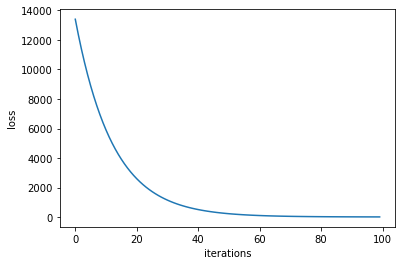

In [185]:
#loss vs. iterations
plt.plot(losses_batch) # alpha is important here ---> make it small as possible
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

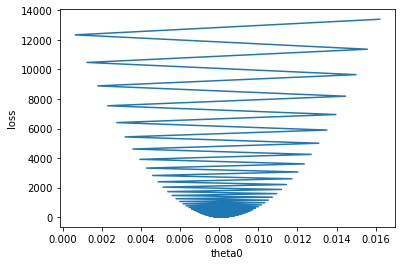

In [186]:
plt.plot(ths_batch[1:,0],losses_batch)
plt.xlabel("theta0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

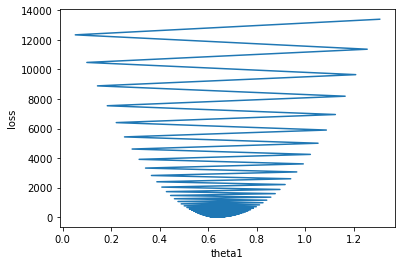

In [187]:
plt.plot(ths_batch[1:,1],losses_batch)
plt.xlabel("theta1")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

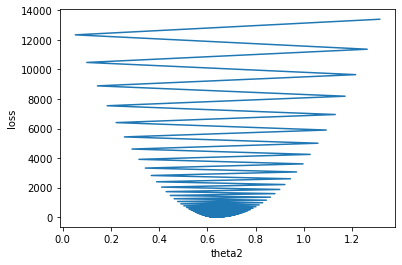

In [188]:
plt.plot(ths_batch[1:,2],losses_batch)
plt.xlabel("theta2")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

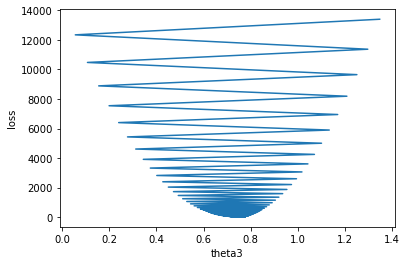

In [189]:
plt.plot(ths_batch[1:,3],losses_batch)
plt.xlabel("theta3")
plt.ylabel("loss")

In [190]:
r2_score(y_mini, y_batch_predict)

0.9679211293123435